In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers for 2-year and 10-year Treasury bond yields from FRED
ticker_2y = "DGS2"  # FRED code for 2-year Treasury bond yield
ticker_10y = "DGS10"  # FRED code for 10-year Treasury bond yield
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data from FRED
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Aligning and cleaning data
combined_data = pd.concat([data_2y, data_10y], axis=1).dropna()
combined_data.columns = ['2Y', '10Y']

# Calculate the spread
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Reset index to turn the date into a column
combined_data.reset_index(inplace=True)
combined_data.rename(columns={'DATE': 'Date'}, inplace=True)

# Fetch Case-Shiller Home Price Index data
cs_ticker = "CSUSHPINSA"  # National Case-Shiller Home Price Index
cs_data = pdr.DataReader(cs_ticker, 'fred', start, end)

# Reset index for cs_data
cs_data.reset_index(inplace=True)

# Merging the Case-Shiller data with the yield data
combined_data_cs = pd.merge(combined_data, cs_data, on='Date', how='left')

# Normalize and plot
combined_data_cs['Normalized_CS'] = (combined_data_cs[cs_ticker] / combined_data_cs[cs_ticker].iloc[0]) * 100
combined_data_cs['Normalized_Spread'] = (combined_data_cs['Spread'] / combined_data_cs['Spread'].iloc[0]) * 100

plt.figure(figsize=(10, 6))
plt.plot(combined_data_cs['Date'], combined_data_cs['Normalized_CS'], label='Case-Shiller Index (Normalized)')
plt.plot(combined_data_cs['Date'], combined_data_cs['Normalized_Spread'], label='Yield Spread (Normalized)')
plt.title('Case-Shiller Index vs. Yield Curve Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Date'

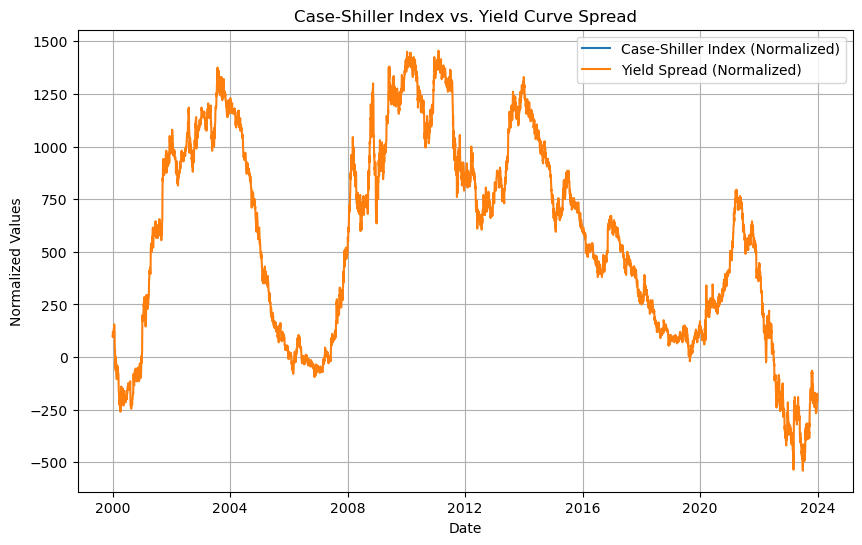

In [2]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers for 2-year and 10-year Treasury bond yields from FRED
ticker_2y = "DGS2"  # FRED code for 2-year Treasury bond yield
ticker_10y = "DGS10"  # FRED code for 10-year Treasury bond yield
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data from FRED
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Aligning and cleaning data
combined_data = pd.concat([data_2y, data_10y], axis=1).dropna()
combined_data.columns = ['2Y', '10Y']

# Calculate the spread
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Reset index to turn the date into a column and ensure proper format
combined_data.reset_index(inplace=True)
combined_data.rename(columns={'DATE': 'Date'}, inplace=True)

# Fetch Case-Shiller Home Price Index data
cs_ticker = "CSUSHPINSA"  # National Case-Shiller Home Price Index
cs_data = pdr.DataReader(cs_ticker, 'fred', start, end)

# Reset index for cs_data and ensure proper format
cs_data.reset_index(inplace=True)
cs_data.rename(columns={'DATE': 'Date'}, inplace=True)

# Merging the Case-Shiller data with the yield data
combined_data_cs = pd.merge(combined_data, cs_data, on='Date', how='left')

# Normalize and plot
combined_data_cs['Normalized_CS'] = (combined_data_cs[cs_ticker] / combined_data_cs[cs_ticker].iloc[0]) * 100
combined_data_cs['Normalized_Spread'] = (combined_data_cs['Spread'] / combined_data_cs['Spread'].iloc[0]) * 100

plt.figure(figsize=(10, 6))
plt.plot(combined_data_cs['Date'], combined_data_cs['Normalized_CS'], label='Case-Shiller Index (Normalized)')
plt.plot(combined_data_cs['Date'], combined_data_cs['Normalized_Spread'], label='Yield Spread (Normalized)')
plt.title('Case-Shiller Index vs. Yield Curve Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


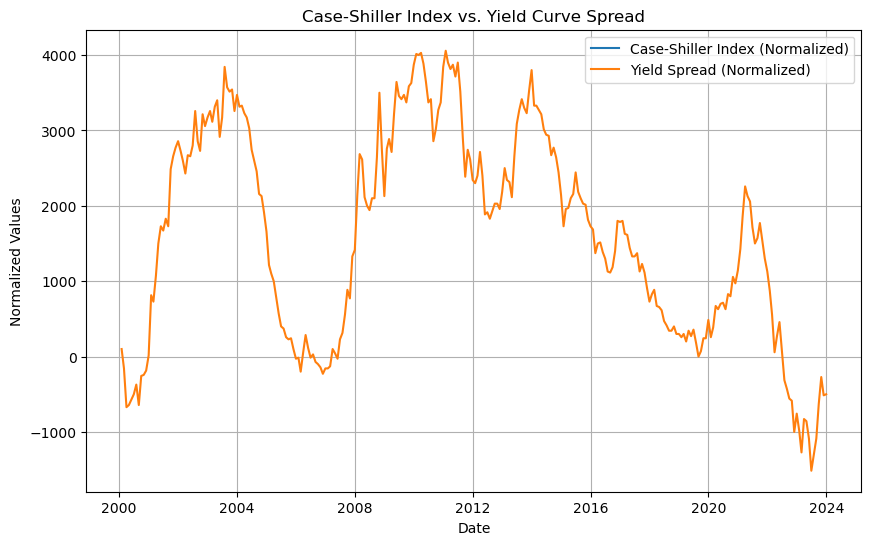

In [3]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers and date range
ticker_2y = "DGS2"
ticker_10y = "DGS10"
cs_ticker = "CSUSHPINSA"
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch Treasury yield data
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Fetch Case-Shiller Index data
cs_data = pdr.DataReader(cs_ticker, 'fred', start, end)

# Resample Treasury yield data to monthly frequency
data_2y_monthly = data_2y.resample('M').last()
data_10y_monthly = data_10y.resample('M').last()

# Calculate the yield spread and resample
combined_data = pd.DataFrame({'2Y': data_2y_monthly['DGS2'], '10Y': data_10y_monthly['DGS10']})
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Merge with Case-Shiller Index
combined_data_cs = combined_data.join(cs_data, how='left')

# Normalize and plot
combined_data_cs['Normalized_CS'] = (combined_data_cs[cs_ticker] / combined_data_cs[cs_ticker].iloc[0]) * 100
combined_data_cs['Normalized_Spread'] = (combined_data_cs['Spread'] / combined_data_cs['Spread'].iloc[0]) * 100

plt.figure(figsize=(10, 6))
plt.plot(combined_data_cs.index, combined_data_cs['Normalized_CS'], label='Case-Shiller Index (Normalized)')
plt.plot(combined_data_cs.index, combined_data_cs['Normalized_Spread'], label='Yield Spread (Normalized)')
plt.title('Case-Shiller Index vs. Yield Curve Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


TypeError: float() argument must be a string or a real number, not 'Period'

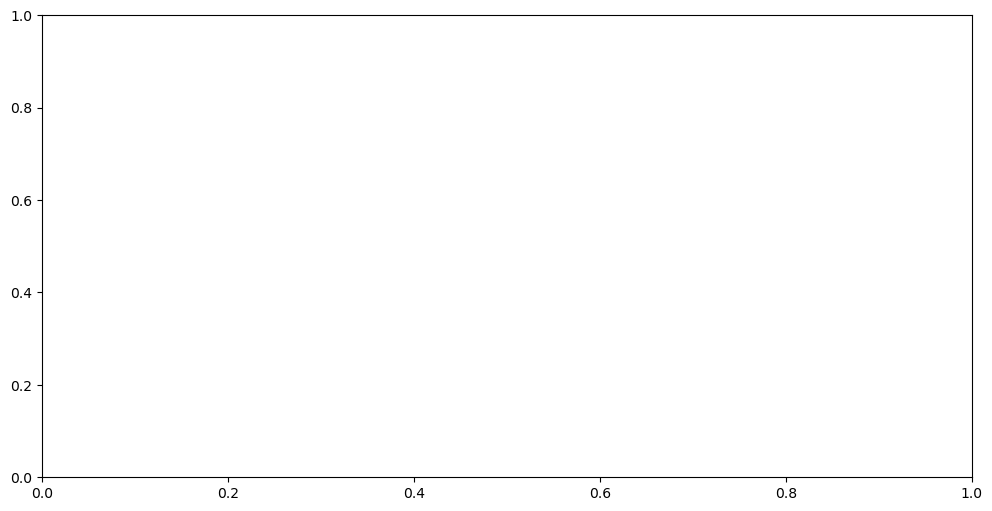

In [4]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers and date range
ticker_2y = "DGS2"
ticker_10y = "DGS10"
cs_ticker = "CSUSHPINSA"
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch Treasury yield data
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Fetch Case-Shiller Index data
cs_data = pdr.DataReader(cs_ticker, 'fred', start, end)

# Resample Treasury yield data to monthly frequency
data_2y_monthly = data_2y.resample('M').last()
data_10y_monthly = data_10y.resample('M').last()

# Calculate the yield spread and resample
combined_data = pd.DataFrame({'2Y': data_2y_monthly['DGS2'], '10Y': data_10y_monthly['DGS10']})
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Ensure Case-Shiller data is monthly
cs_data_monthly = cs_data.resample('M').last()

# Align the indices of both datasets
combined_data.index = combined_data.index.to_period('M')
cs_data_monthly.index = cs_data_monthly.index.to_period('M')

# Merge with Case-Shiller Index
combined_data_cs = combined_data.join(cs_data_monthly, how='inner')

# Normalize the data
combined_data_cs['Normalized_CS'] = (combined_data_cs[cs_ticker] / combined_data_cs[cs_ticker].iloc[0]) * 100
combined_data_cs['Normalized_Spread'] = (combined_data_cs['Spread'] / combined_data_cs['Spread'].iloc[0]) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_data_cs.index, combined_data_cs['Normalized_CS'], label='Case-Shiller Index (Normalized)')
plt.plot(combined_data_cs.index, combined_data_cs['Normalized_Spread'], label='Yield Spread (Normalized)')
plt.title('Case-Shiller Index vs. Yield Curve Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


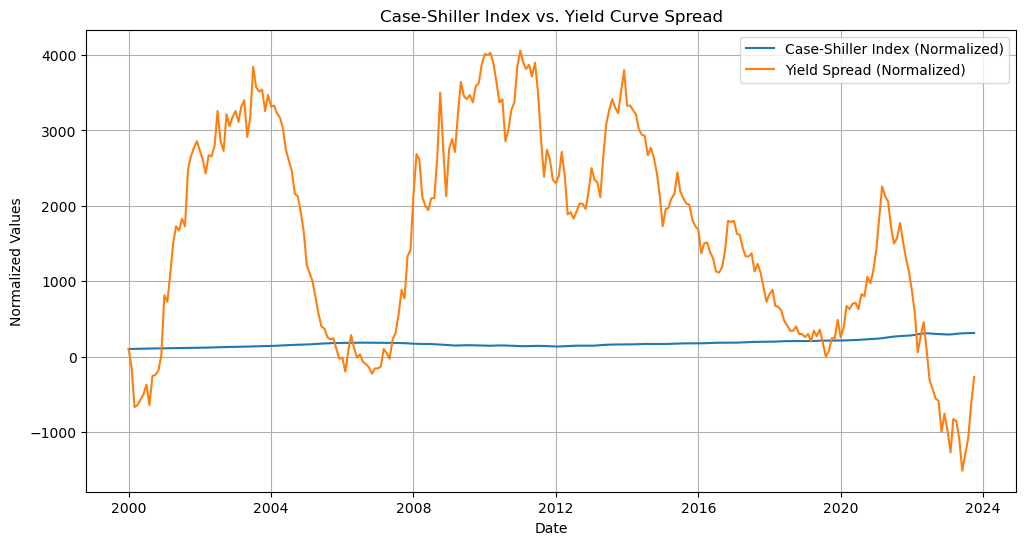

In [5]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers and date range
ticker_2y = "DGS2"
ticker_10y = "DGS10"
cs_ticker = "CSUSHPINSA"
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch Treasury yield data
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Fetch Case-Shiller Index data
cs_data = pdr.DataReader(cs_ticker, 'fred', start, end)

# Resample Treasury yield data to monthly frequency
data_2y_monthly = data_2y.resample('M').last()
data_10y_monthly = data_10y.resample('M').last()

# Calculate the yield spread and resample
combined_data = pd.DataFrame({'2Y': data_2y_monthly['DGS2'], '10Y': data_10y_monthly['DGS10']})
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Ensure Case-Shiller data is monthly
cs_data_monthly = cs_data.resample('M').last()

# Align the indices of both datasets
combined_data.index = combined_data.index.to_period('M')
cs_data_monthly.index = cs_data_monthly.index.to_period('M')

# Merge with Case-Shiller Index
combined_data_cs = combined_data.join(cs_data_monthly, how='inner')

# Convert Period index to datetime for plotting
combined_data_cs.index = combined_data_cs.index.to_timestamp()

# Normalize the data
combined_data_cs['Normalized_CS'] = (combined_data_cs[cs_ticker] / combined_data_cs[cs_ticker].iloc[0]) * 100
combined_data_cs['Normalized_Spread'] = (combined_data_cs['Spread'] / combined_data_cs['Spread'].iloc[0]) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_data_cs.index, combined_data_cs['Normalized_CS'], label='Case-Shiller Index (Normalized)')
plt.plot(combined_data_cs.index, combined_data_cs['Normalized_Spread'], label='Yield Spread (Normalized)')
plt.title('Case-Shiller Index vs. Yield Curve Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()
